All features used , general ML algorithms not fine tunealgorithms , not split as small and large

In [141]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [142]:
# Import pandas libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Data/activemq_result.csv", delimiter=',')

# Explore the dataset
print(data.head()) 



                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

       bug-prone  
0  not bug-pr

In [143]:
# Check missing value
data.isna().sum() # get missing value count of each column

# check missing values
data.isnull().values.any() # no missing values


False

In [144]:
import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check missing value
data.isna().sum() # get missing value count of each column

Method name    0
C20            0
C3             0
C4             0
C1             0
C5             0
C6             0
C2             0
C21            0
C18            0
C8             0
C9             0
C10            0
C17            0
C19            0
C7             0
C11            0
C12            0
C13            0
C14            0
C15            0
C16            0
H6             0
H7             0
H8             0
H9             0
H10            0
H11            0
H16            0
H17            0
H18            0
H19            0
H4             0
H1             0
H2             0
H3             0
H12            0
H13            0
H14            0
H15            0
H5             0
bug-prone      0
dtype: int64

In [145]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

def plot_all_distributions(df):
    # Number of columns in the dataframe
    num_features = df.shape[1]
    
    
    # Create a figure with subplots
    fig, axes = plt.subplots(8, 5, figsize=(15, 24))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each feature
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, stat="density", bins=30, color='blue', alpha=0.6, ax=axes[i])
        sns.kdeplot(df[column], color='red', linewidth=2, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # Hide any unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Select numerical columns only
df = data.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')




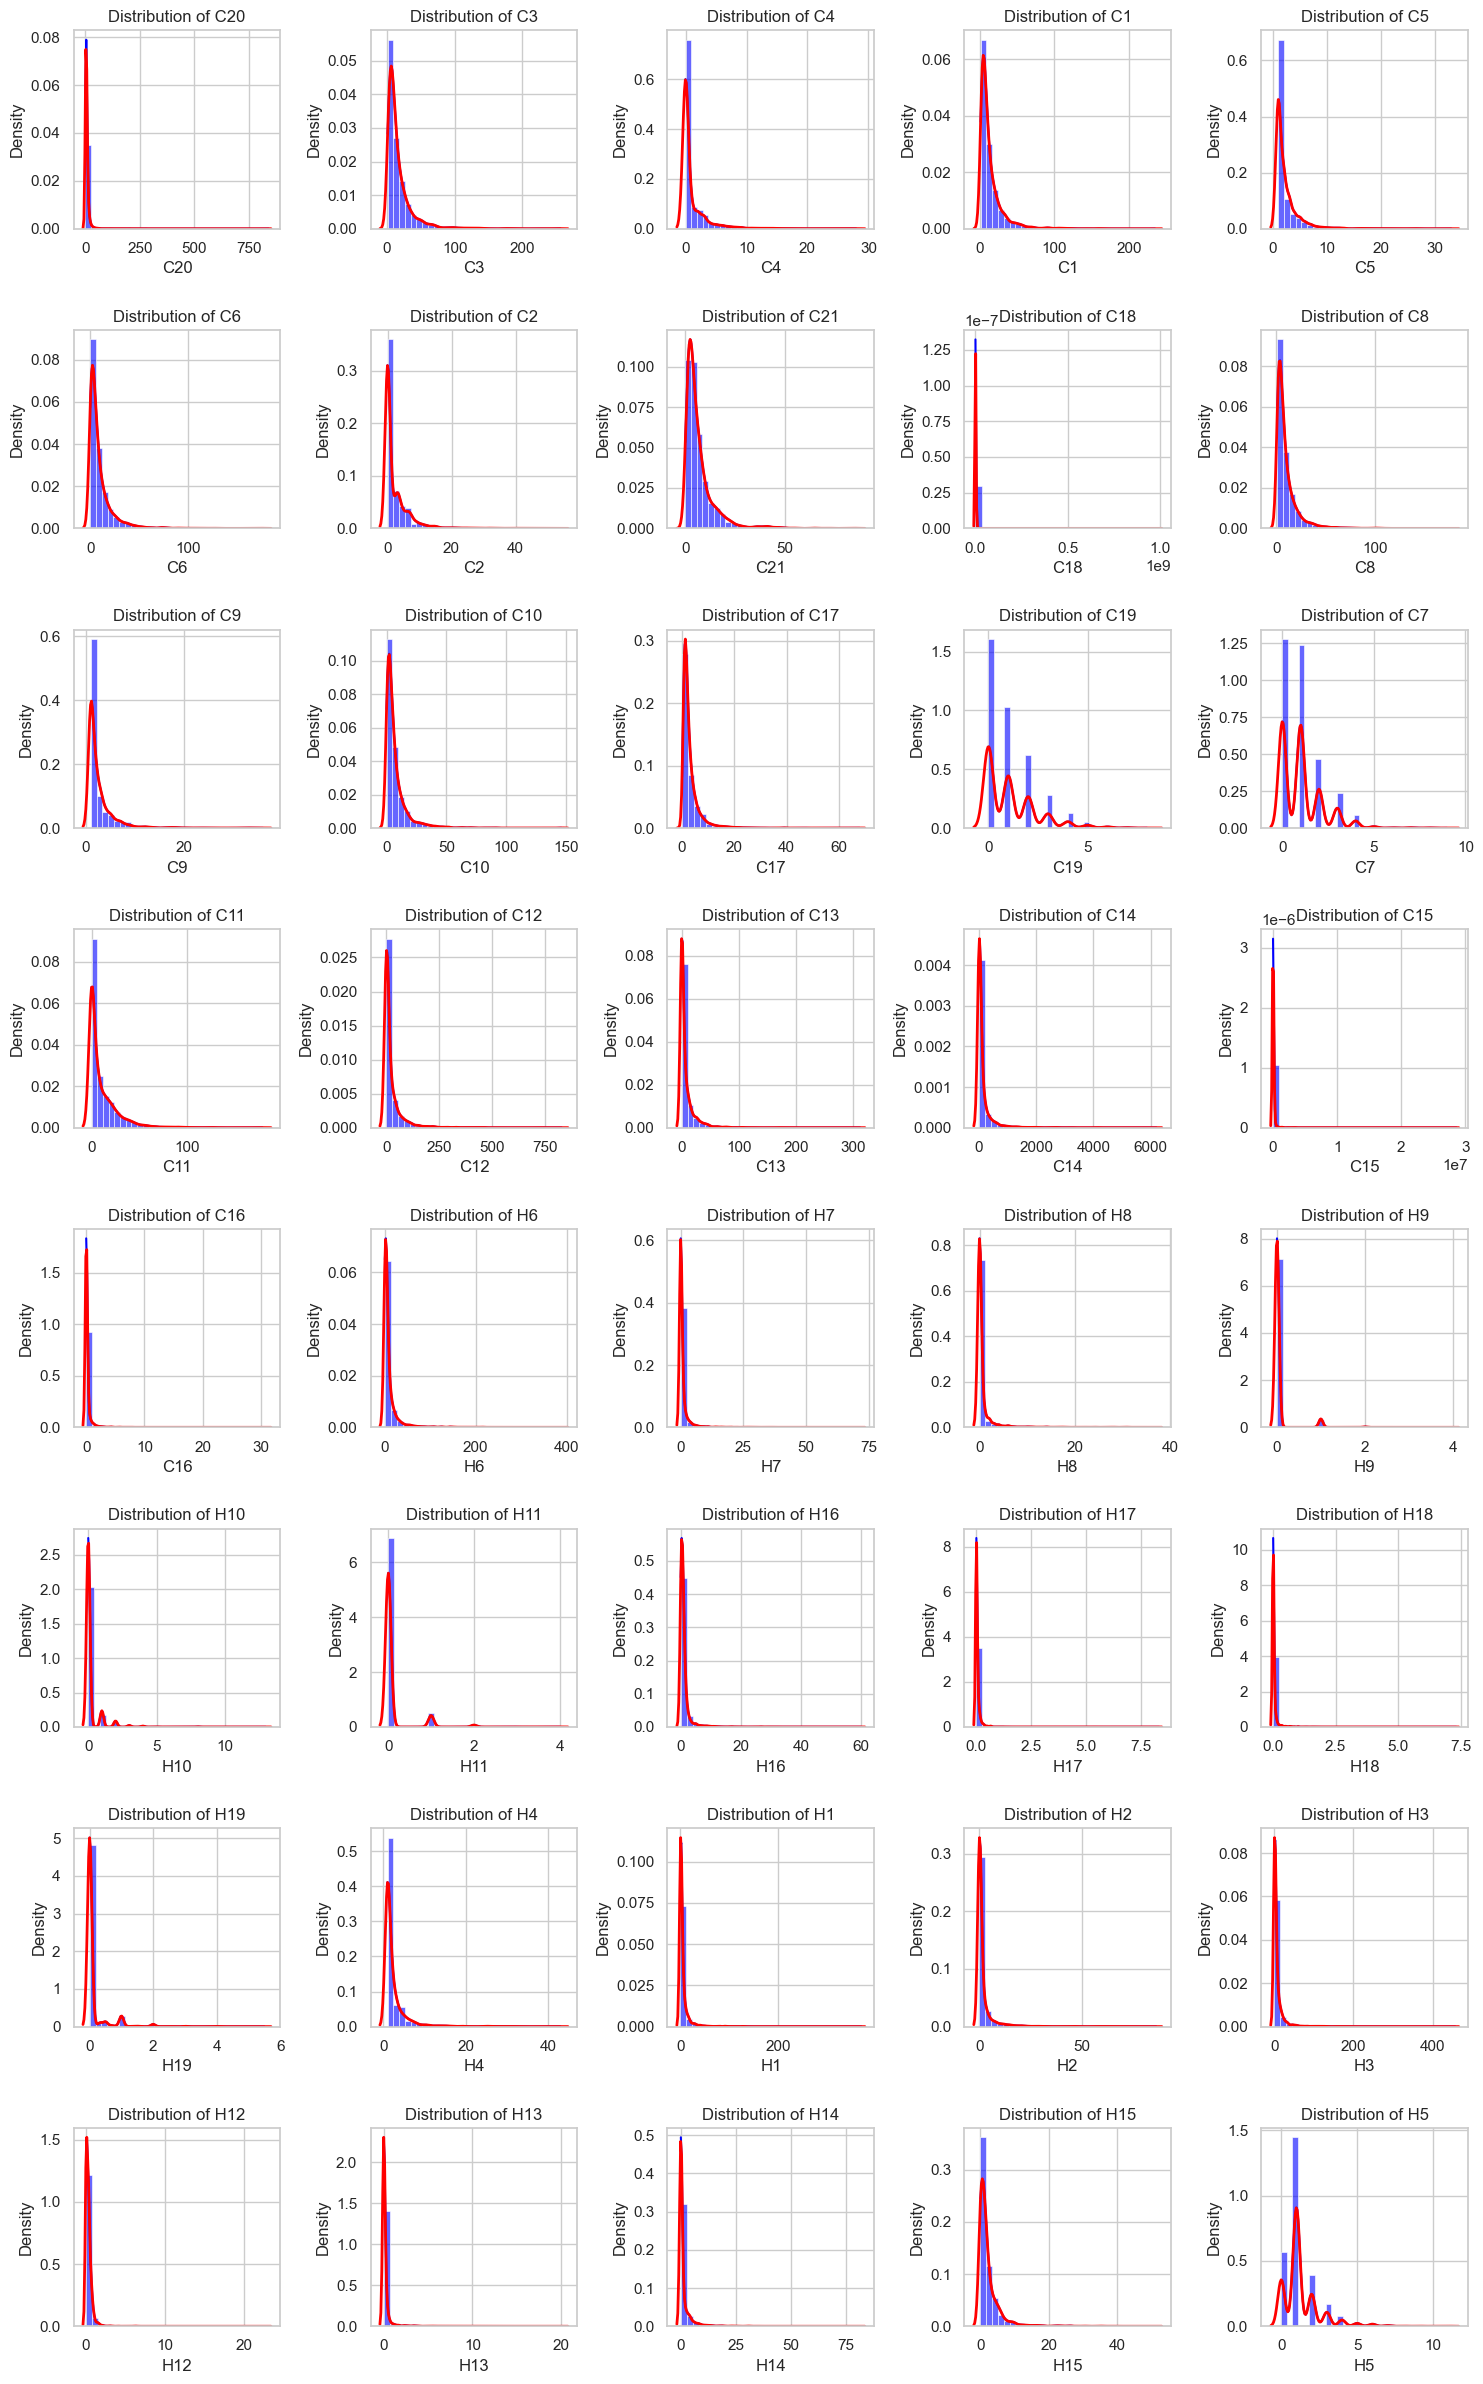

In [146]:
# Plot all distributions
plot_all_distributions(df)

In [147]:

# copy data
data_transform = data.copy()


# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
# from scipy import stats

# # Apply Box-Cox transformation to each variable
# for var in df.columns:
#     # Adding 1 to handle zero values
#     transformed, _ = stats.boxcox(data_transform[var] + 1)
#     data_transform[var] = transformed


# # Check the distribution after transformation
# data_transform[df.columns].hist(figsize=(20, 20))


In [148]:

# Convert 'bug-prone' column to 0 and 1
data_transform['bug-prone'] = data_transform['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)

# Display the updated DataFrame
print(data_transform.head()) 


                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

   bug-prone  
0          0  
1 

In [149]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# split feature data and target data
feature_X = data_transform.drop(columns=['Method name','bug-prone'])
y = data_transform['bug-prone']



In [150]:
# Import train_testplit library
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(feature_X, y, test_size=0.2, random_state=42)

In [151]:
# StandardScaler performs Z-score standardization, which centers the data (mean = 0) 
# and scales it to unit variance (std = 1).
# The best practice is to apply the scaler only on the training set and then use the same transformation parameters to 
# scale the test set. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




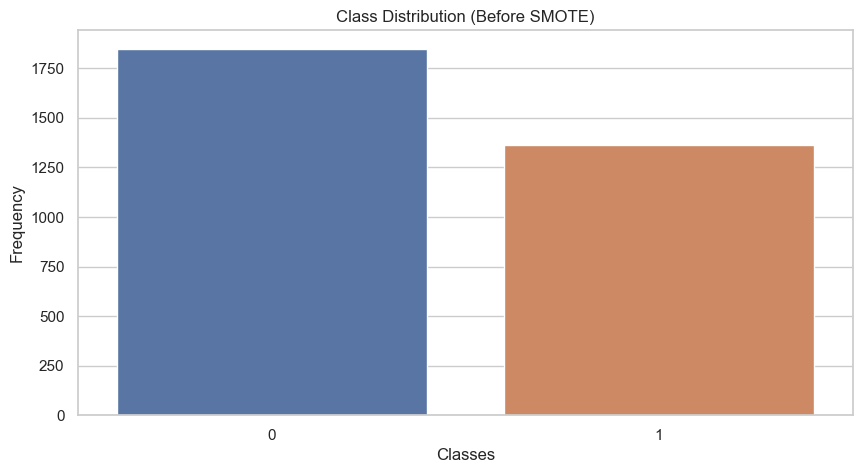

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for small subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title("Class Distribution (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()




In [153]:
print("Class Distribution:")
print(y_train.value_counts())




Class Distribution:
bug-prone
0    1849
1    1363
Name: count, dtype: int64


In [154]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# from imblearn.combine import SMOTEENN
# smoteenn = SMOTEENN(random_state=42)
# X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

In [155]:
print("Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class Distribution After SMOTE:
bug-prone
0    1849
1    1849
Name: count, dtype: int64


In [156]:
X_train = X_train_scaled # X_train_resampled
y_train = y_train # y_train_resampled
X_test = X_test_scaled
y_test = y_test




In [157]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),  # For binary classification
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': make_scorer(roc_auc_score) # , needs_proba=True
}


rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=5, 
                                       min_samples_leaf=2, class_weight='balanced', random_state=42)
# ada_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
bagging_classifier = BaggingClassifier(n_estimators=100, max_samples=0.8, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
mlp_classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(200,100), max_iter=2000, 
                               learning_rate='adaptive', random_state=42)
# gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
# dt_classifier = DecisionTreeClassifier(random_state=42)
# svm_classifier = SVC(random_state=42, probability=True, C=10, kernel='poly', gamma='scale')
# gnb_classifier = GaussianNB(var_smoothing=1e-9)
lr_classifier = LogisticRegression(class_weight='balanced', random_state=42)
xgb_classifier = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
# lgbm_classifier = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
# cb_classifier = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0, random_state=42)


In [158]:
accuracy_s = []
precision_s = []
recall_s = []
f1_s = []
mcc_s = []
auc_s = []

def crossvalidate_fun_s(classifier, X_train, y_train):
    cv_results = cross_validate(classifier, X_train, y_train, cv=10, scoring=scoring)
    accuracy_s.append(cv_results['test_accuracy'].mean())
    precision_s.append(cv_results['test_precision'].mean())
    recall_s.append(cv_results['test_recall'].mean())
    f1_s.append(cv_results['test_f1'].mean())
    mcc_s.append(cv_results['test_mcc'].mean())
    auc_s.append(cv_results['test_auc'].mean())
    print(f"\nF1-Score: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")
    print(f"MCC: {cv_results['test_mcc'].mean():.4f} ± {cv_results['test_mcc'].std():.4f}")
    print(f"AUC: {cv_results['test_auc'].mean():.4f} ± {cv_results['test_auc'].std():.4f}")

crossvalidate_fun_s(rf_classifier,X_train, y_train)
# crossvalidate_fun_s(ada_classifier,X_train, y_train)
crossvalidate_fun_s(bagging_classifier,X_train, y_train)
crossvalidate_fun_s(knn_classifier,X_train, y_train)
crossvalidate_fun_s(mlp_classifier,X_train, y_train)
# crossvalidate_fun_s(gb_classifier,X_train, y_train)
crossvalidate_fun_s(hgb_classifier,X_train, y_train)
# crossvalidate_fun_s(dt_classifier,X_train, y_train)
# crossvalidate_fun_s(svm_classifier,X_train, y_train)
# crossvalidate_fun_s(gnb_classifier,X_train, y_train)
crossvalidate_fun_s(lr_classifier,X_train, y_train)
crossvalidate_fun_s(xgb_classifier,X_train, y_train)
# crossvalidate_fun_s(lgbm_classifier,X_train, y_train)
# crossvalidate_fun_s(cb_classifier,X_train, y_train)

auc_s


F1-Score: 0.7261 ± 0.0311
MCC: 0.5203 ± 0.0531
AUC: 0.7608 ± 0.0267

F1-Score: 0.7180 ± 0.0359
MCC: 0.5165 ± 0.0622
AUC: 0.7568 ± 0.0307

F1-Score: 0.6837 ± 0.0295
MCC: 0.4629 ± 0.0470
AUC: 0.7294 ± 0.0237

F1-Score: 0.6649 ± 0.0357
MCC: 0.4392 ± 0.0551
AUC: 0.7160 ± 0.0273

F1-Score: 0.6895 ± 0.0313
MCC: 0.4739 ± 0.0506
AUC: 0.7346 ± 0.0255

F1-Score: 0.6468 ± 0.0381
MCC: 0.4304 ± 0.0660
AUC: 0.7077 ± 0.0308

F1-Score: 0.6666 ± 0.0340
MCC: 0.4614 ± 0.0526
AUC: 0.7234 ± 0.0261


[0.7608404232587731,
 0.7568010168119844,
 0.7294390984970073,
 0.7159728269068442,
 0.7346077279325363,
 0.7077357839058839,
 0.7233779356390758]

In [159]:

# Build models
models = {
    
    "RandomForest" :  RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=5, 
                                       min_samples_leaf=2, class_weight='balanced', random_state=42),
    # "AdaBoostClassifier" : AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "BaggingClassifier" : BaggingClassifier(n_estimators=100, max_samples=0.8, random_state=42),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan'),
    "MLPClassifier" : MLPClassifier(activation='relu', hidden_layer_sizes=(200,100), max_iter=2000, 
                               learning_rate='adaptive', random_state=42),
    # "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    "HistGradientBoostingClassifier" : HistGradientBoostingClassifier(random_state=42),   
    # "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "XGBClassifier" : XGBClassifier(eval_metric='logloss', random_state=42),
    # "SVC" : SVC(random_state=42, probability=True, C=10, kernel='poly', gamma='scale'),
    # "GaussianNB" : GaussianNB(var_smoothing=1e-9),
    "LogisticRegression" : LogisticRegression(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    # "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    # "CatBoost": CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0, random_state=42)
}


probabilities = []
for name, model in models.items():
    # print(f"Training {name}...")
    # Train traditional ML models
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    probabilities.append(y_pred_proba)
    print(f"F1 ({name}): {f1_score(y_test, (y_pred_proba > 0.5).astype(int)):.4f}")


# model.predict_proba() returns a 2D array where each row contains the predicted probabilities for each class (0 and 1).
# [:, 1] extracts the probabilities for class 1.

F1 (RandomForest): 0.7273
F1 (BaggingClassifier): 0.7145
F1 (KNeighborsClassifier): 0.6858
F1 (MLPClassifier): 0.7016
F1 (HistGradientBoostingClassifier): 0.7152
F1 (XGBClassifier): 0.7328
F1 (LogisticRegression): 0.6701
F1 (XGBoost): 0.6789


In [160]:
# Average probabilities for small group
avg_proba = np.mean(probabilities, axis=0)


In [161]:
# Combine probabilities and ground truths
final_proba = avg_proba
final_y_test = y_test
final_pred = (final_proba >= 0.5).astype(int)

# Evaluate combined results
print("\nFinal Combined Results:")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")




Final Combined Results:
Accuracy: 0.79
Precision: 0.73
Recall: 0.75
F1-Score: 0.74


In [162]:
# 1
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

def get_optimal_threshold(y_true, y_proba):
    """
    Compute the optimal threshold using Youden's Index.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Combine probabilities and ground truths for evaluation
final_proba = avg_proba
final_y_test = y_test

# Get optimal threshold using Youden's Index
optimal_threshold = get_optimal_threshold(final_y_test, final_proba)
print(f"Optimal Threshold using Youden's Index: {optimal_threshold:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= optimal_threshold).astype(int)

# Evaluate combined results
print("\nFinal Combined Results (Using Optimal Threshold):")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.2f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.2f}")



Optimal Threshold using Youden's Index: 0.4280

Final Combined Results (Using Optimal Threshold):
Accuracy: 0.79
Precision: 0.70
Recall: 0.82
F1-Score: 0.75
MCC: 0.58
AUC: 0.88


In [163]:
# 2

# Combine probabilities and ground truths for evaluation
final_proba = avg_proba
final_y_test = y_test

from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)
print(f"Optimal Threshold (Precision-Recall Curve): {best_threshold_pr:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= best_threshold_pr).astype(int)


# Evaluate combined results
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.2f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.2f}")


# Optimal Threshold (Precision-Recall Curve): 0.3668
# Accuracy: 0.78
# Precision: 0.66
# Recall: 0.88
# F1-Score: 0.76
# MCC: 0.58
# AUC: 0.88


Optimal Threshold (Precision-Recall Curve): 0.4280
Accuracy: 0.79
Precision: 0.70
Recall: 0.82
F1-Score: 0.75
MCC: 0.58
AUC: 0.88


In [164]:
# 3

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
from scipy.stats import mode
import numpy as np

# Convert probabilities to binary predictions using threshold 
predictions = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities])


majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

# Combine majority votes for evaluation
final_predictions = majority_vote
final_ground_truth = y_test

# Compute AUC using average probabilities
combined_probs = avg_proba

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")


# Accuracy: 0.75
# Precision: 0.63
# Recall: 0.87
# F1-Score: 0.73
# MCC: 0.53
# AUC: 0.88


Accuracy: 0.79
Precision: 0.72
Recall: 0.77
F1-Score: 0.74
MCC: 0.57
AUC: 0.88


In [165]:
# 4

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
import numpy as np


# AUC scores from cross-validation
auc_scores = auc_s

# Normalize AUC scores to get weights
weights = [score / sum(auc_scores) for score in auc_scores]

# Compute weighted average probabilities
combined_probs = np.sum([weight * probs for weight, probs in zip(weights, probabilities)], axis=0)



from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = combined_probs
final_y_test = y_test
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)



# Convert probabilities to binary predictions using threshold
predictions = (combined_probs > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = predictions
final_ground_truth = y_test


# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# Accuracy: 0.77
# Precision: 0.66
# Recall: 0.87
# F1-Score: 0.75
# MCC: 0.57
# AUC: 0.88

Accuracy: 0.79
Precision: 0.71
Recall: 0.80
F1-Score: 0.75
MCC: 0.57
AUC: 0.88


In [166]:
# 5

# accuracy_s = []
# precision_s = []
# recall_s = []
# f1_s = []
# mcc_s = []
# auc_s = []

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
import numpy as np

# AUC and F1 scores from cross-validation
auc_scores = [score if score is not None else 0 for score in auc_s]  # Replace None with 0
f1_scores = [score if score is not None else 0 for score in f1_s]  # Replace None with 0



# Use the maximum of AUC and F1-score for weighting
max_scores = [max(auc, f1) for auc, f1 in zip(auc_scores, f1_scores)]

# Normalize the weights (avoid division by zero)
if sum(max_scores) == 0:
    raise ValueError("All max(AUC, F1) scores are zero, cannot compute weights.")

weights = [score / sum(max_scores) for score in max_scores]

# Compute weighted average probabilities
combined_probs = np.sum([weight * probs for weight, probs in zip(weights, probabilities)], axis=0)



from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = combined_probs
final_y_test = y_test
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)
adjusted_threshold = best_threshold_pr * 0.95  # Reduce by 5% (experiment with values)


# Convert probabilities to binary predictions using threshold
predictions = (combined_probs > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = predictions
final_ground_truth = y_test


# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# Accuracy: 0.77
# Precision: 0.66
# Recall: 0.87
# F1-Score: 0.75
# MCC: 0.57
# AUC: 0.88

Accuracy: 0.79
Precision: 0.71
Recall: 0.80
F1-Score: 0.75
MCC: 0.57
AUC: 0.88


In [167]:
# # 6

# from sklearn.ensemble import VotingClassifier

# # Use F1-score as model weight
# weights = f1_s

# voting_clf = VotingClassifier(estimators=[
#     ('rf', models["RandomForest"]),
#     # ('ad', models["AdaBoostClassifier"]),
#     ('bg', models["BaggingClassifier"]),
#     ('knn', models["KNeighborsClassifier"]),
#     ('mlp', models["MLPClassifier"]),
#     ('gb', models["GradientBoostingClassifier"]),
#     # ('dt', models["DecisionTreeClassifier"]),
#     # ('svc', models["SVC"]),
#     # ('nb', models["GaussianNB"]),
#     # ('lr', models["LogisticRegression"]),
#     ('xgb', models["XGBClassifier"]),
#     ('cb', models["CatBoostClassifier"])
# ], voting='soft', weights=weights)  # Assign higher weight to models with high F1-score

# voting_clf.fit(X_train, y_train)
# y_pred = voting_clf.predict(X_test)

# # Evaluate F1-score
# f1 = f1_score(y_test, y_pred)
# print(f"F1-score: {f1:.2f}")


In [168]:
# 7

# Compute standard deviation of probabilities
sigma_d = np.std(final_proba)

# Find max probability from base learners
maxPD_lj = np.max(probabilities, axis=0)  # Maximum probability for each instance

# Normalize scores for weighting
max_scores = [max(auc, f1) for auc, f1 in zip(auc_s, f1_s)]
weights = [score / sum(max_scores) for score in max_scores]

# Adjust probabilities based on conditions
adjusted_probs = [
    (weight * (1 - probs)) if (sigma_d < 0.25 and maxPD < 0.5) else (weight * probs) 
    for weight, probs, maxPD in zip(weights, probabilities, maxPD_lj)
]

# Compute the final weighted combination
combined_probs = np.sum(adjusted_probs, axis=0)

from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = combined_probs
final_y_test = y_test
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)
adjusted_threshold = best_threshold_pr * 0.9  # Reduce by 10% (experiment with values)


# Convert probabilities to binary predictions using threshold
predictions = (combined_probs > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = predictions
final_ground_truth = y_test




# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)


print(f"best_threshold_pr: {best_threshold_pr:.4f}")

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# best_threshold_pr: 0.3694
# Accuracy: 0.77
# Precision: 0.66
# Recall: 0.87
# F1-Score: 0.75
# MCC: 0.57
# AUC: 0.88

best_threshold_pr: 0.4514
Accuracy: 0.79
Precision: 0.71
Recall: 0.80
F1-Score: 0.75
MCC: 0.57
AUC: 0.88


In [175]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(feature_X)

models = {
    
    "RandomForest" :  RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=5, 
                                       min_samples_leaf=2, class_weight='balanced', random_state=42),
    # "AdaBoostClassifier" : AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "BaggingClassifier" : BaggingClassifier(n_estimators=100, max_samples=0.8, random_state=42),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan'),
    "MLPClassifier" : MLPClassifier(activation='relu', hidden_layer_sizes=(200,100), max_iter=2000, 
                               learning_rate='adaptive', random_state=42),
    # "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    "HistGradientBoostingClassifier" : HistGradientBoostingClassifier(random_state=42),   
    # "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "XGBClassifier" : XGBClassifier(eval_metric='logloss', random_state=42),
    # "SVC" : SVC(random_state=42, probability=True, C=10, kernel='poly', gamma='scale'),
    # "GaussianNB" : GaussianNB(var_smoothing=1e-9),
    "LogisticRegression" : LogisticRegression(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    # "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    # "CatBoost": CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0, random_state=42)
}

# Initialize cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store metrics
f1_scores, mcc_scores, auc_scores = [], [], []

# Perform 10-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    probabilities = []
    max_scores = []
    
    # Train all models and get probabilities
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1
        probabilities.append(y_pred_proba)
        max_scores.append(roc_auc_score(y_test, y_pred_proba))  # Use AUC as weight
    
    # Normalize AUC scores to get weights
    weights = [score / sum(max_scores) for score in max_scores]
    
    # # Compute weighted average probabilities
    # sigma_d = np.std(np.concatenate(probabilities))  # Compute standard deviation of probabilities
    # combined_probs = np.zeros_like(probabilities[0])

    # for weight, probs in zip(weights, probabilities):
    #     max_proba = np.max(probs)  # Maximum probability from this model
    #     if sigma_d < 0.25 and max_proba < 0.5:
    #         combined_probs += weight * (1 - probs)  # Invert probabilities
    #     else:
    #         combined_probs += weight * probs

    combined_probs = np.sum([weight * probs for weight, probs in zip(weights, probabilities)], axis=0)

    # Determine best threshold using precision-recall
    from sklearn.metrics import precision_recall_curve

    def get_best_threshold_precision_recall(y_true, y_proba):
        precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
        f1_scores = 2 * (precision * recall) / (precision + recall)
        f1_scores = np.nan_to_num(f1_scores)
        best_threshold = thresholds[np.argmax(f1_scores)]
        return best_threshold

    best_threshold_pr = get_best_threshold_precision_recall(y_test, combined_probs)

    # Convert probabilities to binary predictions using threshold
    predictions = (combined_probs > best_threshold_pr).astype(int)

    # Compute performance metrics
    f1_scores.append(f1_score(y_test, predictions))
    mcc_scores.append(matthews_corrcoef(y_test, predictions))
    auc_scores.append(roc_auc_score(y_test, combined_probs))

# Print final results (average over 10 folds)
print(f"Final 10-Fold CV Results:")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"MCC: {np.mean(mcc_scores):.4f} ± {np.std(mcc_scores):.4f}")
print(f"AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")


Final 10-Fold CV Results:
F1-Score: 0.7659 ± 0.0147
MCC: 0.5769 ± 0.0308
AUC: 0.8773 ± 0.0147


In [ ]:
# import shap

# # Fit the model
# rf_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)

# # Explain predictions
# explainer = shap.TreeExplainer(rf_classifier_s)
# shap_values = explainer.shap_values(X_test_resampled_s)

# # Visualize feature importance
# shap.summary_plot(shap_values[1], X_test_resampled_s)
